In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Laden der Daten
data = pd.read_csv('desciption_weather.csv')
data2 = pd.read_csv('desciption_weather.csv')

In [2]:
# Umwandlung der textuellen Beschreibungen in numerische Werte
label_encoder = LabelEncoder()
data['Description'] = label_encoder.fit_transform(data['Description'])

for class_name, class_number in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name} => {class_number}")

# Vorbereitung der Features und Labels (Zielvariable ist nun 'Temperature_c')
features = data.drop('Temperature_c', axis=1)
labels = data['Temperature_c']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Skalierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Erstellen des neuronalen Netzwerks
model = Sequential([
    Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Keine Aktivierungsfunktion für Regression
])

# Kompilieren des Modells
model.compile(loss='mean_squared_error', optimizer='adam')

# Trainieren des Modells
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=0)

# Evaluierung des Modells
loss = model.evaluate(X_test_scaled, y_test)
predicted_temperatures = model.predict(X_test_scaled)
print(X_train)
print(predicted_temperatures)
print(f'Mittlerer quadratischer Fehler: {loss}')



Cold => 0
Normal => 1
Warm => 2
63/63 [==============================] - 0s 487us/step
      Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  Visibility_km  \
9254      0.81         13.6528                   159        16.0517   
1561      0.87          9.3058                   257         9.9015   
1670      0.93          4.8300                   150         1.8676   
6087      0.73         15.5043                   140         9.9820   
6669      0.92          6.6332                    88        16.1000   
...        ...             ...                   ...            ...   
5734      0.77          9.6600                    20         9.9820   
5191      0.65         23.7153                   320        10.2557   
5390      0.92         12.5419                    21         6.3434   
860       0.34          9.6761                   174         9.9820   
7270      0.93          4.2182                    57        11.1251   

      Pressure_millibars  Rain  Description  
9254          

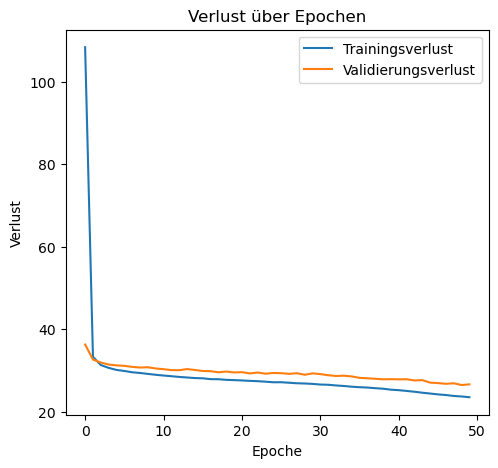

63/63 [==============================] - 0s 498us/step


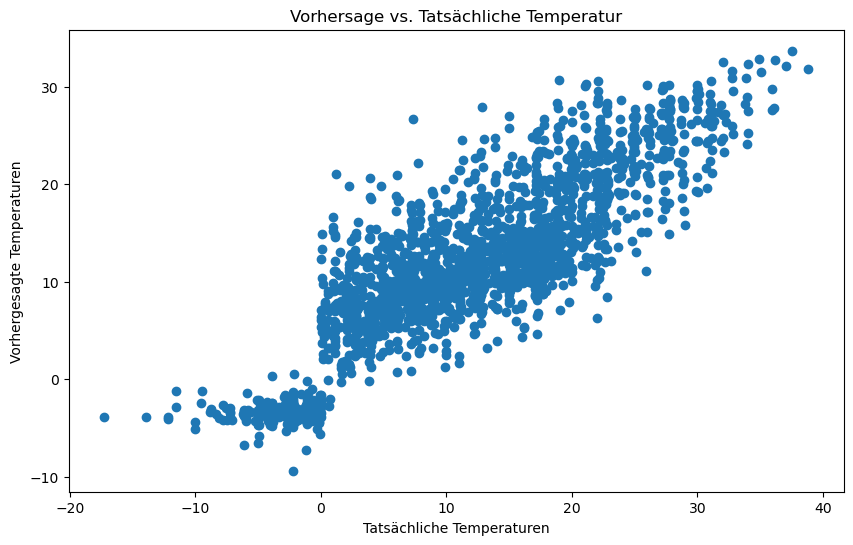

In [3]:
# Visualisierung der Trainingshistorie
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Verlust über Epochen')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend()
plt.show()

# Optional: Vorhersagen mit dem Modell und Vergleich mit tatsächlichen Werten
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Tatsächliche Temperaturen')
plt.ylabel('Vorhergesagte Temperaturen')
plt.title('Vorhersage vs. Tatsächliche Temperatur')
plt.show()


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Vorhersagen mit dem trainierten Modell
y_pred = model.predict(X_test_scaled)

# Berechnung von MAE, MSE und RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Berechnung von R-Squared
r_squared = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared: {r_squared}')

63/63 [==============================] - 0s 498us/step
Mean Absolute Error (MAE): 3.844826638298638
Mean Squared Error (MSE): 24.362154696284094
Root Mean Squared Error (RMSE): 4.935803348623615
R-Squared: 0.7196647625637885


In [5]:
new_data = pd.read_csv('Kolbermoor-Wetter.csv')
# Umwandlung der textuellen Beschreibungen in numerische Werte
#label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data2['Description'])
for class_name, class_number in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name} => {class_number}")
new_data['Description'] = label_encoder.transform(new_data['Description'])


# Vorbereitung der Features und Labels (Zielvariable ist nun 'Temperature_c')
features2 = new_data.drop('Temperature_c', axis=1)
labels2 = new_data['Temperature_c']

# Aufteilen der Daten in Trainings- und Testsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Skalierung der Features
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

#features = new_data.drop('Temperature_c', axis=1)
#labels = new_data['Temperature_c']
#new_data_scaled = scaler.fit_transform(features)
print("Erwartete Eingabegröße des Modells:", model.input_shape)
#print("Aktuelle Größe des neuen Datensatzes:", X_train2.shape)
#print("Aktuelle Größe des neuen Datensatzes:", X_test2.shape)
print("Aktuelle Größe des neuen Datensatzes:", new_data)

Cold => 0
Normal => 1
Warm => 2
Erwartete Eingabegröße des Modells: (None, 7)
Aktuelle Größe des neuen Datensatzes:    Temperature_c  Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  \
0           10.0       0.6             2.0                   130   
1           10.0       0.6             2.0                   130   
2           10.0       0.6             2.0                   130   
3           10.0       0.6             2.0                   130   
4           10.0       0.6             2.0                   130   
5           10.0       0.6             2.0                   130   

   Visibility_km  Pressure_millibars  Rain  Description  
0          39.05              1033.6     1            1  
1          39.05              1033.6     1            0  
2          39.05              1033.6     1            2  
3          39.05              1033.6     1            2  
4          39.05              1033.6     1            1  
5          39.05              1033.6     1            0  


In [6]:
predicted_temperatures2 = model.predict(X_train_scaled2)
print(X_train2)
print('Predicted: ')
print(predicted_temperatures2)
print('Test: ')
print(X_test2)

1/1 [==============================] - 0s 13ms/step
   Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  Visibility_km  \
5       0.6             2.0                   130          39.05   
2       0.6             2.0                   130          39.05   
4       0.6             2.0                   130          39.05   
3       0.6             2.0                   130          39.05   

   Pressure_millibars  Rain  Description  
5              1033.6     1            0  
2              1033.6     1            2  
4              1033.6     1            1  
3              1033.6     1            2  
Predicted: 
[[ 9.084487]
 [11.961537]
 [ 8.459096]
 [11.961537]]
Test: 
   Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  Visibility_km  \
0       0.6             2.0                   130          39.05   
1       0.6             2.0                   130          39.05   

   Pressure_millibars  Rain  Description  
0              1033.6     1            1  
1              1033.6     1  